In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
import pandas_profiling
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score


In [10]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Теперь нужно удалить пустые данные и нулевые занчения

In [14]:
data = df.drop(['2ndFlrSF', '3SsnPorch', 'Alley', 'BsmtFinSF2', 'EnclosedPorch', 'Fence', 'LowQualFinSF', 'MasVnrArea',
                  'MiscFeature', 'MiscVal', 'PoolArea', 'PoolQC', 'ScreenPorch', 'WoodDeckSF', 'MasVnrType', 'Id'], axis=1)

In [15]:
data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,548,TA,TA,Y,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,608,TA,TA,Y,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,642,TA,TA,Y,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,836,TA,TA,Y,84,12,2008,WD,Normal,250000


In [16]:
cat_col = [i for i in data.columns if data[i].dtype.name == 'object']
num_col   = [i for i in data.columns if data[i].dtype.name != 'object']

for i in cat_col:
    data[i].fillna('None', inplace=True)
    
for j in num_col:
    data[j].fillna(0, inplace=True)
    
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,548,TA,TA,Y,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,608,TA,TA,Y,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,642,TA,TA,Y,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,836,TA,TA,Y,84,12,2008,WD,Normal,250000


Переведем категориальные признаки в числовые

In [19]:
for i in cat_col:
    try:
        encoder = LabelEncoder()
        data[i] = encoder.fit_transform(data[i])
    except:
        continue

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,548,TA,TA,Y,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,608,TA,TA,Y,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,642,TA,TA,Y,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,836,TA,TA,Y,84,12,2008,WD,Normal,250000


In [20]:
category_last = [c for c in data.columns if data[c].dtype.name == 'object']
data = data.drop(category_last, axis=1)
data = data.fillna(0)


Теперь разделим данные для предсказания и обучения

In [23]:
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### Случайный лес

In [24]:
clf = RandomForestRegressor(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [33]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(f'Модель качественна на: {scores.mean():.2f}')
y_pred = clf.predict(X_test)
print('R2: {:.2f}'.format(r2_score(y_test, y_pred)))

Модель качественна на: 0.82
R2: 0.85


Определим какие параметры важны

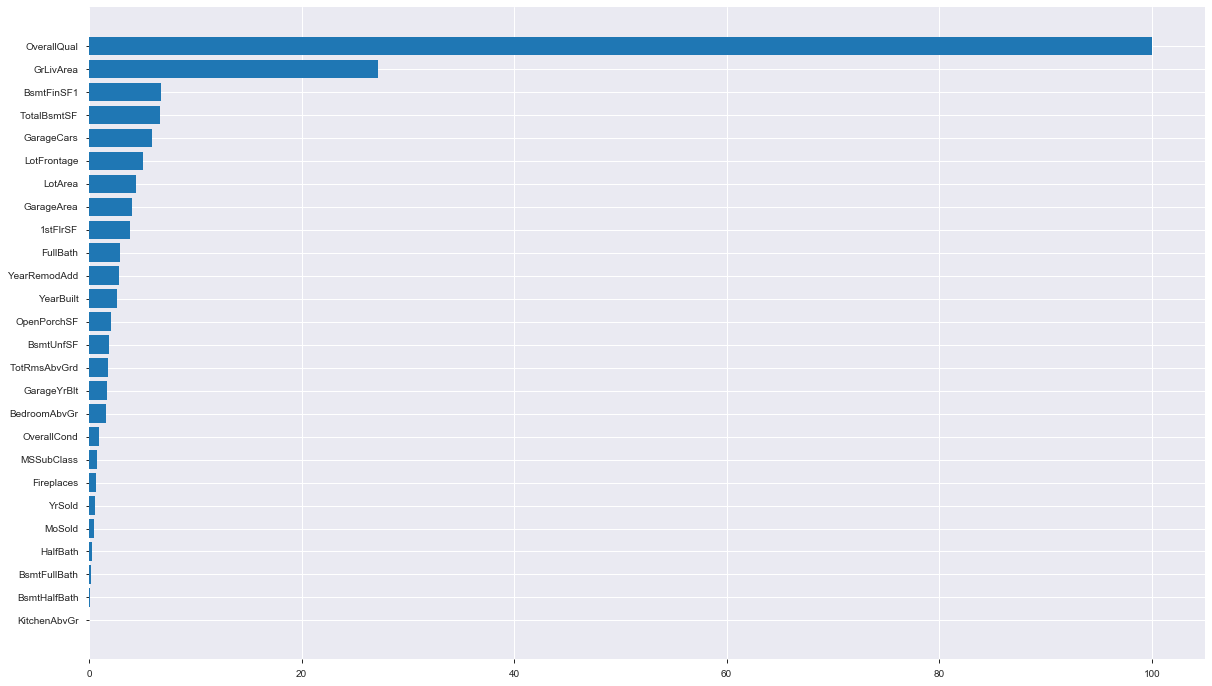

In [35]:
importance = clf.feature_importances_
importance = 100.0 * (importance / importance.max())
sorted_index = np.argsort(importance)
p = np.arange(sorted_index.shape[0]) + .5
plt.figure(figsize=(20, 12))
plt.barh(p, importance[sorted_index])
plt.yticks(p, data.columns[sorted_index])
plt.show()

### Ансамбль

In [37]:
estimators = [('linear', LinearRegression()), 
              ('svr', SVR()),
              ('tree', DecisionTreeRegressor())]

In [40]:
stackingRegressor = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=42))
stackingRegressor.fit(X_train, y_train)


StackingRegressor(cv=None,
                  estimators=[('linear',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False)),
                              ('svr',
                               SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma='scale', kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False)),
                              ('tree',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_fe...
                  final_estimator=RandomForestRegressor(bootstrap=True,
                                                        ccp_alpha=0.0

In [43]:
y_pred_stacking_regressor = stackingRegressor.predict(X_test)
score_ensemble = cross_val_score(stackingRegressor, X_train, y_train, cv=10)
print('Модель качественна на: {:.2f}'.format(score_ensemble.mean()))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_stacking_regressor)))

Модель качественна на: 0.83
R2: 0.87
